<a href="https://colab.research.google.com/github/Kornshnaps/nlp_support_project/blob/master/NLMK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import numpy as np
#data = pd.read_csv('D:\\whales\\train.csv')
from google.colab import drive
drive.mount('/content/drive')#,force_remount=True)
import io
#data = pd.read_csv('drive/My Drive/Colab Notebooks/train.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:


img = cv2.imread('C:\\Users\\pugac\\Downloads/foto.png')
img2 = cv2.imread('C:\\Users\\pugac\\Downloads/O-5Z6VXpfCo.jpg')
img1 = cv2.imread('C:\\Users\\pugac\\Downloads/foto2.png')
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: ignored

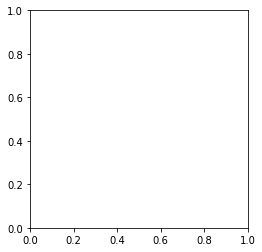

In [0]:
plt.imshow(img)


In [0]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

NameError: ignored

In [0]:
plt.imshow(thresh)
cv2.imwrite('C:\\Users\\pugac\\Desktop\datagen\\'+str(1111)+'.jpg',thresh)
        

NameError: ignored

TypeError: ignored

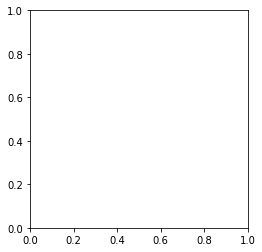

In [0]:
plt.imshow(img1)

In [0]:
img1= img1[0:500, 0:500]
plt.imshow(img1)

TypeError: ignored

In [0]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.utils

Using TensorFlow backend.


In [0]:

x = np.zeros((1,464, 500, 3))
img = cv2.resize(img,(464, 500))
img1  = image.img_to_array(img1)
x[0] = img1
#x=  keras.utils.normalize(x,axis = 1)
datagen = ImageDataGenerator( horizontal_flip=True,
    zca_epsilon=9,
    rescale=1,)
datagen.fit(x)
i=0
batch_size=9
for img_batch in datagen.flow(x, batch_size=9):
    for img1 in img_batch:
        plt.subplot(330 + 1 + i)
        plt.imshow(img1)
       # cv2.imwrite('C:\\Users\\pugac\\Desktop\datagen\\'+str(i)+'.jpg',img1)
        i=i+1    
    if i >= batch_size:
        break

NameError: ignored

In [0]:
plt.imshow(x[0])

NameError: ignored

In [0]:
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import skimage.io
from skimage import color
from skimage import io
import glob
import cv2
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import skimage

In [0]:
#taken from: https://www.kaggle.com/bguberfain/elastic-transform-for-data-augmentation
# Function to distort image
def elastic_transform(image, alpha, sigma, alpha_affine, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

In [0]:

def draw_grid(im, grid_size):
    # Draw grid lines
    for i in range(0, im.shape[1], grid_size):
        cv2.line(im, (i, 0), (i, im.shape[0]), color=(1,))
    for j in range(0, im.shape[0], grid_size):
        cv2.line(im, (0, j), (im.shape[1], j), color=(1,))

In [0]:
w = 2048
h = 430
from PIL import Image
a  = [16,17,18,19,20]
train_x = np.zeros((len(a)*10,h, w,3))
train_y = np.zeros((len(a)*10,h, w,1))

for i in range(len(a)):
    img = np.array(Image.open('drive/My Drive/Colab Notebooks/NLMKCollab/test1_x/'+str(a[i])+'.jpg'))
    img = cv2.resize(img,(w,h))
    print(img.shape)
    img = image.img_to_array(img)
    train_x[i] = img
    img1 =  np.array(Image.open('drive/My Drive/Colab Notebooks/NLMKCollab/test_y/'+str(a[i])+'.jpg'))
    img1 = cv2.resize(img1,(w,h))
    gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #img1 = image.img_to_array(img1)
    thresh = np.expand_dims(thresh, axis=-1)
    train_y[i] = thresh
    for j in range(10):
        im  = np.array(Image.open('drive/My Drive/Colab Notebooks/NLMKCollab/test1_x/'+str(a[i])+'.jpg'))
        im = cv2.resize(img,(w,h))
        #print(im.shape)
        im_mask= np.array(Image.open('drive/My Drive/Colab Notebooks/NLMKCollab/test_y/'+str(a[i])+'.jpg'))
        print(im_mask.shape)
        im_mask = cv2.resize(img,(w,h))
        print(im_mask.shape)
        #draw_grid(im, 50)
        im_merge = np.concatenate((im[...,None], im_mask[...,None]), axis=2)
        #print(im_merge.shape)
        im = elastic_transform(im_merge, im_merge.shape[1] * 2, im_merge.shape[1] * 0.08, im_merge.shape[1] * 0.08)
        im_t = im[...,0]
        im_mask_t = im[...,1]
        train_x[i+j] = image.img_to_array(im_t)
        train_y[i+j] = image.img_to_array(im_mask_t)

(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048, 3)
(430, 2048)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(445, 2048, 3)
(430, 2048)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(436, 2048, 3)
(430, 2048)
(430, 2048)
(446, 2048, 3)
(430, 2048)
(446, 2048, 3)
(430, 2048)
(446, 2048, 3)
(430, 2048)
(446, 2048, 3)
(430, 2048)
(446, 2048, 3)
(430, 2048)


In [0]:
img = Image.open('drive/My Drive/Colab Notebooks/NLMKCollab/test1_x/16.jpg')


In [0]:
import keras
train_x = keras.utils.normalize(train_x,axis = 1)
#train_y =  keras.utils.normalize(train_y ,axis = 1)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

from skimage.draw import ellipse, polygon

from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.optimizers import Adam
from keras.layers import BatchNormalization,Dense,ZeroPadding2D, Flatten, Input, UpSampling2D,Conv2D,Cropping2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from keras.losses import binary_crossentropy
import tensorflow as tf
import keras as keras

from keras import backend as K


In [0]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        cw = (target.get_shape()[2] - refer.get_shape()[2]).value
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1]).value
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)
    

def get_unet(patch_height,patch_width,n_ch):
    concat_axis = 3

    inputs = Input((patch_height, patch_width, n_ch))
    
    conv1 = Conv2D(32, (3, 3), padding="same", name="conv1_1", activation="relu", data_format="channels_last")(inputs)
    conv1 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool1)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)

    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool2)
    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv3)

    conv4 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool3)
    conv4 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv4)

    conv5 = Conv2D(512, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool4)
    conv5 = Conv2D(512, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv5)

    up_conv5 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv5)
    ch, cw = get_crop_shape(conv4, up_conv5)
    crop_conv4 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv4)
    up6   = concatenate([up_conv5, crop_conv4], axis=concat_axis)
    conv6 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(up6)
    conv6 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv6)

    up_conv6 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv6)
    ch, cw = get_crop_shape(conv3, up_conv6)
    crop_conv3 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv3)
    up7   = concatenate([up_conv6, crop_conv3], axis=concat_axis)
    conv7 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(up7)
    conv7 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv7)

    up_conv7 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv7)
    ch, cw = get_crop_shape(conv2, up_conv7)
    crop_conv2 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv2)
    up8   = concatenate([up_conv7, crop_conv2], axis=concat_axis)
    conv8 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(up8)
    conv8 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv8)

    up_conv8 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv8)
    ch, cw = get_crop_shape(conv1, up_conv8)
    crop_conv1 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv1)
    up9   = concatenate([up_conv8, crop_conv1], axis=concat_axis)
    conv9 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(up9)
    conv9 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv9)

    ch, cw = get_crop_shape(inputs, conv9)
    conv9  = ZeroPadding2D(padding=(ch[0],cw[0]), data_format="channels_last")(conv9)
    conv10 = Conv2D(1, (1, 1), data_format="channels_last", activation="sigmoid")(conv9)
    
    #flatten =  Flatten()(conv9)
    #Dense1 = Dense(512, activation='relu')(flatten)
    #BN =BatchNormalization() (Dense1)
    #Dense2 = Dense(17, activation='sigmoid')(BN)
    
    model = Model(input=inputs, output= conv10)#=Dense2)
    
    return model


model = get_unet( h, w,3)
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
model.summary()

In [0]:
 model.fit(x = train_x, y= train_y, epochs=20,validation_split=0.1)


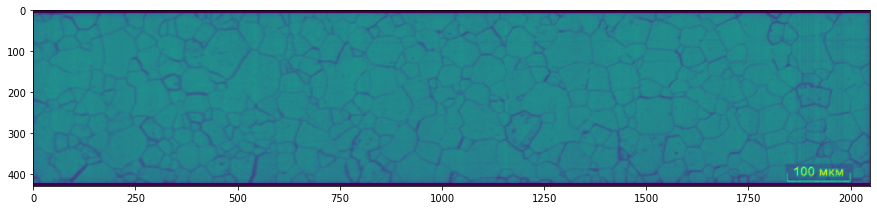

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(model.predict(train_x[0:1])[0][:,:,0])

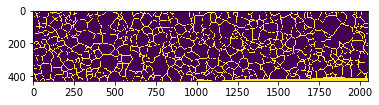

In [0]:
plt.imshow(train_y[2][:,:,0])

In [0]:
w = 2048
h = 430
input_layer = Input((h, w, 3))
a  = [16,17,18,19,20,21]
train_x = np.zeros((len(a)*20,h, w,1))
train_y = np.zeros((len(a)*20,h, w,1))

for i in range(len(a)):
    img = skimage.io.imread('D:\\NLMK\\test1_x\\'+str(a[i])+'.jpg',as_gray=True)
    img = cv2.resize(img,(w,h))
    img = image.img_to_array(img)
    train_x[i+19] = img
    img1 =   skimage.io.imread('D:\\NLMK\\test_y\\'+str(a[i])+'.jpg',as_gray=True)
    img1 = image.img_to_array(img1)
    img1 = cv2.resize(img1,(w,h))
    train_y[i+19] = img
    for j in range(10):
        im  = skimage.io.imread('D:\\NLMK\\test1_x\\'+str(a[i])+'.jpg',as_gray=True)
        print(im.shape)
        im_mask= skimage.io.imread('D:\\NLMK\\test_y\\'+str(a[i])+'.jpg',as_gray=True)
        print(im_mask.shape)
        #draw_grid(im, 50)
        im_merge = np.concatenate((im[...,None], im_mask[...,None]), axis=2)
        print(im_merge.shape)
        im = elastic_transform(im_merge, im_merge.shape[1] * 2, im_merge.shape[1] * 0.08, im_merge.shape[1] * 0.08)
        im_t = im[...,0]
        im_mask_t = im[...,1]
        train_x[i+j] = image.img_to_array(im_t)
        train_y[i+j] = image.img_to_array(im_mask_t)
        #cv2.imwrite('C:\\Users\\pugac\\Desktop\datagen\\'+str(i)+'.png',im_t*255)
        #cv2.imwrite('C:\\Users\\pugac\\Desktop\datagen\\'+str(i)+'k'+'.png',im_mask_t*255)

FileNotFoundError: ignored

In [0]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [0]:
    from keras.layers.core import Dropout, Lambda
    from keras.layers.core import Inputs
    input_layer = Input((256, 256, 3))
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.summary()

 

ImportError: ignored

In [0]:

input_layer = Input((h, w, 1))
output_layer = build_model(input_layer, 16)
model = Model(input_layer, output_layer)
model.compile(loss=bce_dice_loss, optimizer=Adam(lr=1e-3), metrics=[my_iou_metric])
model.save_weights('./keras.weights')

while True:
    history = model.fit(train_x, train_y,
                        batch_size=32,
                        epochs=1,
                        verbose=1,
                        validation_split=0.1
                       )
    if history.history['my_iou_metric'][0] > 0.75:
        break

NameError: ignored